Nama Anggoa Kelompok:

1. Ersa Amelia 2311110009

2. Kezia Intan Natalie (20110030)


In [ ]:
import csv
import pandas as pd

In [ ]:
data = pd.read_csv("/content/TUBES AKA - Sheet1.csv")
data.head(10)

,Nama Film,Genre,Jam Tayang,Studio
0,Kemah Terlarang : Kesurupan Massal,Horror,13.30,Cinema 1
1,Kemah Terlarang : Kesurupan Massal,Horror,15.30,Cinema 1
2,Kemah Terlarang : Kesurupan Massal,Horror,19.40,Cinema 1
3,Tebusan Dosa,"Horror, Mystery",11.00,Cinema 2
4,Tebusan Dosa,"Horror, Mystery",21.55,Cinema 2
5,Kuasa Gelap,Horror,12.30,Cinema 3
6,Kuasa Gelap,Horror,14.25,Cinema 3
7,Kuasa Gelap,Horror,16.20,Cinema 3
8,Smile 2,"Horror, Thriller, Mystery",11.40,Cinema 4
9,Smile 2,"Horror, Thriller, Mystery",13.50,Cinema 4


In [ ]:
# Fungsi untuk menampilkan seluruh daftar film
def display_all_movies():
    return data[['Nama Film', 'Genre', 'Jam Tayang', 'Studio']]

# Contoh penggunaan
all_movies = display_all_movies()
print("Daftar Film yang Tersedia:")
print(all_movies)


Daftar Film yang Tersedia:
                             Nama Film                      Genre  Jam Tayang  \
0   Kemah Terlarang : Kesurupan Massal                     Horror       13.30   
1   Kemah Terlarang : Kesurupan Massal                     Horror       15.30   
2   Kemah Terlarang : Kesurupan Massal                     Horror       19.40   
3                         Tebusan Dosa            Horror, Mystery       11.00   
4                         Tebusan Dosa            Horror, Mystery       21.55   
5                          Kuasa Gelap                     Horror       12.30   
6                          Kuasa Gelap                     Horror       14.25   
7                          Kuasa Gelap                     Horror       16.20   
8                              Smile 2  Horror, Thriller, Mystery       11.40   
9                              Smile 2  Horror, Thriller, Mystery       13.50   
10                             Smile 2  Horror, Thriller, Mystery       15.60   
1

Semua Kasus selesai
1. Mencari film yang tersedia berdasarkan kriteria tertentu (nama, genre, atau tanggal)
2. memilih kursi yang tersedia tanpa memesan kursi yang sama dengan pengguna lain
3. melakukan pemesanan tiket dengan cepat dan akurat.
4. dua algoritma ( rekrusif dan iteratif di apliasikan)
5. Program membandingkan kinerja algoritma rekursif dan iteratif dalam menghitung bilangan Fibonacci untuk berbagai nilai input n

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from functools import lru_cache
from prettytable import PrettyTable



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


class Studio:
    def __init__(self, name, rows=5, seats_per_row=5):
        self.name = name
        self.seats = [["O" for _ in range(seats_per_row)] for _ in range(rows)]  # "O" menandakan kursi kosong

    def display_seats(self):
        print(f"\n--- Seat Layout for {self.name} ---")
        for i, row in enumerate(self.seats, start=1):
            print(f"Row {i}: {' '.join(row)}")
        print("O = Available, X = Booked")

    def book_seat(self, row, seat):
        if 1 <= row <= len(self.seats) and 1 <= seat <= len(self.seats[0]):
            if self.seats[row - 1][seat - 1] == "O":
                self.seats[row - 1][seat - 1] = "X"
                return True
        return False


class TicketBookingSystem:
    def __init__(self, movie_data):
        self.movies = movie_data
        self.studios = {studio_name: Studio(studio_name) for studio_name in movie_data["Studio"].unique()}

    def display_movies(self):
        print("\n--- Available Movies ---")
        for i, row in self.movies.iterrows():
            print(
                f"{i+1}. {row['Nama Film']} | Genre: {row['Genre']} | Jam: {row['Jam Tayang']} | Studio: {row['Studio']}"
            )

    def search_movies(self, search_by, query):
        filtered_movies = self.movies[self.movies[search_by].str.contains(query, case=False, na=False)]
        if filtered_movies.empty:
            print(f"\nNo movies found for {search_by}: {query}.")
        else:
            print(f"\n--- Search Results for {search_by}: {query} ---")
            for i, row in filtered_movies.iterrows():
                print(
                    f"{i+1}. {row['Nama Film']} | Genre: {row['Genre']} | Jam: {row['Jam Tayang']} | Studio: {row['Studio']}"
                )
        return filtered_movies

    def book_ticket(self):
        self.display_movies()
        movie_choice = int(input("\nChoose a movie (by number): ")) - 1
        if movie_choice < 0 or movie_choice >= len(self.movies):
            print("Invalid choice. Returning to main menu.")
            return

        selected_movie = self.movies.iloc[movie_choice]
        studio = self.studios[selected_movie["Studio"]]

        # Menampilkan kursi yang tersedia
        studio.display_seats()

        while True:
            row = int(input(f"Enter the row number (1-{len(studio.seats)}): "))
            seat = int(input(f"Enter the seat number (1-{len(studio.seats[0])}): "))

            if studio.book_seat(row, seat):
                print(f"Successfully booked Row {row}, Seat {seat} in {studio.name}!")
                break
            else:
                print("Seat is already booked or invalid. Please try again.")

        # Menampilkan kursi setelah pemesanan
        studio.display_seats()


# Membaca data film dari file CSV
data = pd.read_csv("/content/TUBES AKA - Sheet1.csv")

# Inisialisasi sistem
system = TicketBookingSystem(data)

# Interface utama
while True:
    print("\n--- Welcome to the Ticket Booking System ---")
    print("1. View all movies")
    print("2. Search for movies")
    print("3. Book a ticket")
    print("4. Exit")
    choice = input("Choose an option (1/2/3/4): ").strip()

    if choice == "1":
        system.display_movies()
    elif choice == "2":
        print("\nSearch by:")
        print("1. Name")
        print("2. Genre")
        print("3. Show Time (Jam Tayang)")
        search_choice = input("Choose an option (1/2/3): ").strip()

        if search_choice == "1":
            name_query = input("Enter the movie name: ").strip()
            system.search_movies("Nama Film", name_query)
        elif search_choice == "2":
            genre_query = input("Enter the genre: ").strip()
            system.search_movies("Genre", genre_query)
        elif search_choice == "3":
            time_query = input("Enter the show time (e.g., 13.30): ").strip()
            system.search_movies("Jam Tayang", time_query)
        else:
            print("Invalid choice. Returning to the main menu.")
    elif choice == "3":
        system.book_ticket()
    elif choice == "4":
        print("Thank you for using the Ticket Booking System!")
        break
    else:
        print("Invalid choice. Please try again.")



--- Welcome to the Ticket Booking System ---
1. View all movies
2. Search for movies
3. Book a ticket
4. Exit
Choose an option (1/2/3/4): 1

--- Available Movies ---
1. Kemah Terlarang : Kesurupan Massal | Genre: Horror | Jam: 13.3 | Studio: Cinema 1
2. Kemah Terlarang : Kesurupan Massal | Genre: Horror | Jam: 15.3 | Studio: Cinema 1
3. Kemah Terlarang : Kesurupan Massal | Genre: Horror | Jam: 19.4 | Studio: Cinema 1
4. Tebusan Dosa | Genre: Horror, Mystery | Jam: 11.0 | Studio: Cinema 2
5. Tebusan Dosa | Genre: Horror, Mystery | Jam: 21.55 | Studio: Cinema 2
6. Kuasa Gelap | Genre: Horror | Jam: 12.3 | Studio: Cinema 3
7. Kuasa Gelap | Genre: Horror | Jam: 14.25 | Studio: Cinema 3
8. Kuasa Gelap | Genre: Horror | Jam: 16.2 | Studio: Cinema 3
9. Smile 2 | Genre: Horror, Thriller, Mystery | Jam: 11.4 | Studio: Cinema 4
10. Smile 2 | Genre: Horror, Thriller, Mystery | Jam: 13.5 | Studio: Cinema 4
11. Smile 2 | Genre: Horror, Thriller, Mystery | Jam: 15.6 | Studio: Cinema 4
12. Bolehkah 


--- Movie Data ---
                             Nama Film                      Genre  Jam Tayang  \
0   Kemah Terlarang : Kesurupan Massal                     Horror       13.30   
1   Kemah Terlarang : Kesurupan Massal                     Horror       15.30   
2   Kemah Terlarang : Kesurupan Massal                     Horror       19.40   
3                         Tebusan Dosa            Horror, Mystery       11.00   
4                         Tebusan Dosa            Horror, Mystery       21.55   
5                          Kuasa Gelap                     Horror       12.30   
6                          Kuasa Gelap                     Horror       14.25   
7                          Kuasa Gelap                     Horror       16.20   
8                              Smile 2  Horror, Thriller, Mystery       11.40   
9                              Smile 2  Horror, Thriller, Mystery       13.50   
10                             Smile 2  Horror, Thriller, Mystery       15.60   
11     B

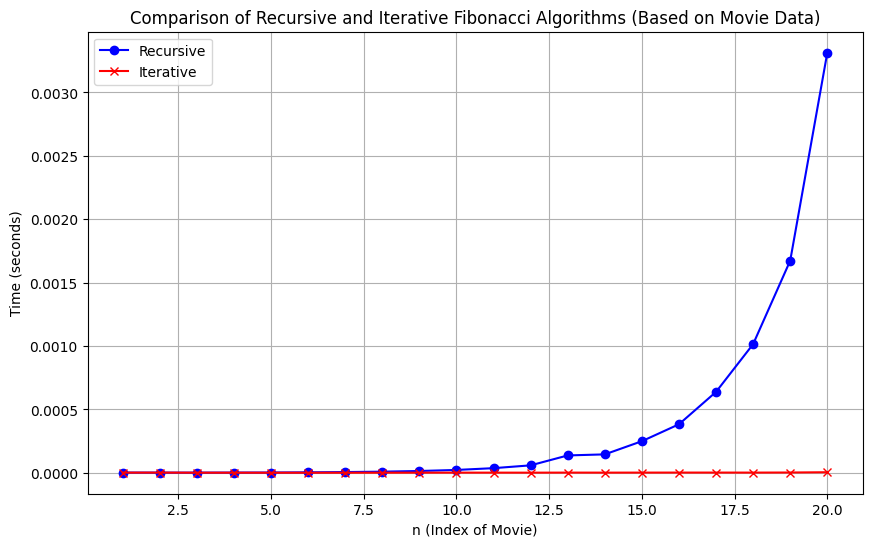

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt


# Algoritma Fibonacci Rekursif
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)


# Algoritma Fibonacci Iteratif
def fibonacci_iterative(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b


# Fungsi untuk membandingkan kinerja algoritma Fibonacci berdasarkan data film
def compare_fibonacci(data):
    # Menentukan nilai n berdasarkan indeks film
    n_values = list(range(1, len(data) + 1))

    # Menyimpan waktu eksekusi
    recursive_times = []
    iterative_times = []

    # Menghitung waktu eksekusi untuk setiap nilai n
    for n in n_values:
        # Rekursif
        start_time = time.time()
        fibonacci_recursive(n)
        recursive_time = time.time() - start_time
        recursive_times.append(recursive_time)

        # Iteratif
        start_time = time.time()
        fibonacci_iterative(n)
        iterative_time = time.time() - start_time
        iterative_times.append(iterative_time)

    # Menampilkan hasil
    print("\n--- Fibonacci Performance Comparison ---")
    for n, rec_time, it_time in zip(n_values, recursive_times, iterative_times):
        print(f"Fibonacci({n}): Recursive Time = {rec_time:.6f} seconds, Iterative Time = {it_time:.6f} seconds")

    # Visualisasi
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, recursive_times, label="Recursive", color='blue', marker='o')
    plt.plot(n_values, iterative_times, label="Iterative", color='red', marker='x')
    plt.xlabel("n (Index of Movie)")
    plt.ylabel("Time (seconds)")
    plt.title("Comparison of Recursive and Iterative Fibonacci Algorithms (Based on Movie Data)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Membaca data film dari file CSV
file_path = "/content/TUBES AKA - Sheet1.csv"
data = pd.read_csv(file_path)

# Menampilkan data film (opsional)
print("\n--- Movie Data ---")
print(data)

# Membandingkan algoritma Fibonacci berdasarkan data film
compare_fibonacci(data)


Bahwa algoritma iterative lebih unggul dibandingkan rekrusif dalam efesiensi waktu. terlihat pada fibonaci ke 20 iterative nya 0.000004 detik sedangkan recursive nya pada fibonaci ke 20 itu 0.003313 detik.

maka lebih cepat waktu eksekusi nya adalah algortma iterative.
Algoritma Iteratif Lebih Efisien dalam semua nilai
𝑛, baik kecil maupun besar, karena kompleksitasnya yang linear.
Waktu eksekusi iteratif tetap rendah bahkan saat
𝑛 bertambah besar.
